# Calidad del Sueño

## 1. Definición del Problema de Machine Learning

El objetivo del siguiente trabajo es predecir la calidad de sueño de una persona basándonos en datos como duración del sueño, niveles de estrés, nivel de actividad física durante el día (ya sea caminando o haciendo deporte), etc.

El target (calidad de sueño) consiste en un conjunto de valores discretos multiclase (marcados con valores que van del 1 al 5).

Las métricas principales de clasificación son: F1-score, precisión, recall o accuracy.

La métrica secundaria es la matriz de confusión para ver qué clases se confunden más.

**Impacto del proyecto**
- Si el modelo predice una mala calidad del sueño, el sector hospitalario podrá establecer medidas personalizadas acorde a los problemas de las personas.
- Tener un sueño reparador podría:
  1. Mejorar la satisfacción personal y laboral del usuario, reduciendo problemas de salud relacionados con el sueño y mejorando la productividad en su día a día.
  2. Evitar accidentes de tráfico, lo que puede ayudar a salvar vidas.

Los **requisitos mínimos** de rendimiento serán:
- El modelo debe alcanzar al menos un 80% de precisión en la exactitud de los datos (si es de 90% o más sería muy bueno) siempre y cuando las clases estén balanceadas.
- Los valores de F1-score deben tener un mínimo de 0.60 para ser aceptables, si tiene 0.70 serán buenos y si son mayores a 0.80 será excelente.
- La matriz de confusión será buena si no comete errores graves en las clases importantes.

## 2. Recolección y Exploración de Datos

1. Obtener el dataset completo
2. Realizar análisis exploratorio inicial:
   - Dimensiones del dataset
   - Tipos de datos
   - Estadísticas descriptivas básicas
   - Distribución de variables
   - Correlaciones
3. Verificar la calidad de los datos:
   - Identificar valores faltantes
   - Detectar inconsistencias
   - Verificar el balance de clases (para clasificación)
   - Identificar posibles errores en los datos

In [1]:
import warnings

#Tratamiento de Datos
import pandas as pd
import numpy as np

#Gráficos
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

#Machine Learning
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")

In [2]:
sleep=pd.read_csv('../data/raw/Sleep.csv')

In [3]:
df=sleep.copy()

In [4]:
df.head()

,Gender,Age,Sleep duration,Sleep quality,Stress level,Blood pressure,Heart rate,Daily steps,Physical activity,Height,...,Smoking,Medical issue,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease
0,F,24,9.5,2,1,137/89,67,3000,31,161,...,N,Y,Y,N,8.7,N,Y,Y,N,Y
1,M,39,9.6,2,3,108/64,60,12000,74,164,...,N,Y,Y,N,9.6,Y,N,N,Y,Y
2,F,45,5.4,1,5,134/81,95,12000,93,179,...,N,N,N,Y,4.0,N,Y,N,N,N
3,F,45,5.4,4,5,110/90,78,19000,32,160,...,N,Y,N,N,7.6,N,Y,N,Y,N
4,F,42,5.7,3,2,99/67,72,4000,173,179,...,N,Y,N,N,3.5,N,Y,Y,N,Y


### Dimensiones del dataset

In [5]:
df.shape

(20000, 26)

### Tipos de datos

In [6]:
df.info()
print("Filas:", df.shape[0])
print("Columnas:", df.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       20000 non-null  object 
 1   Age                          20000 non-null  int64  
 2   Sleep duration               20000 non-null  float64
 3   Sleep quality                20000 non-null  int64  
 4   Stress level                 20000 non-null  int64  
 5   Blood pressure               20000 non-null  object 
 6   Heart rate                   20000 non-null  int64  
 7   Daily steps                  20000 non-null  int64  
 8   Physical activity            20000 non-null  int64  
 9   Height                       20000 non-null  int64  
 10  Weight                       20000 non-null  int64  
 11  Sleep disorder               20000 non-null  object 
 12  Wake up during night         20000 non-null  object 
 13  Feel sleepy duri

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isnull().sum()

Gender                         0
Age                            0
Sleep duration                 0
Sleep quality                  0
Stress level                   0
Blood pressure                 0
Heart rate                     0
Daily steps                    0
Physical activity              0
Height                         0
Weight                         0
Sleep disorder                 0
Wake up during night           0
Feel sleepy during day         0
Caffeine consumption           0
Alcohol consumption            0
Smoking                        0
Medical issue                  0
Ongoing medication             0
Smart device before bed        0
Average screen time            0
Blue-light filter              0
Discomfort Eye-strain          0
Redness in eye                 0
Itchiness/Irritation in eye    0
Dry Eye Disease                0
dtype: int64

### Valores únicos

In [9]:
print(df['Gender'].value_counts())
print(df['Sleep disorder'].value_counts())
print(df['Wake up during night'].value_counts())
print(df['Feel sleepy during day'].value_counts())
print(df['Caffeine consumption'].value_counts())
print(df['Alcohol consumption'].value_counts())
print(df['Smoking'].value_counts())
print(df['Medical issue'].value_counts())
print(df['Ongoing medication'].value_counts())
print(df['Smart device before bed'].value_counts())
print(df['Blue-light filter'].value_counts())

Gender
M    10028
F     9972
Name: count, dtype: int64
Sleep disorder
N    10069
Y     9931
Name: count, dtype: int64
Wake up during night
N    10000
Y    10000
Name: count, dtype: int64
Feel sleepy during day
N    10178
Y     9822
Name: count, dtype: int64
Caffeine consumption
Y    10089
N     9911
Name: count, dtype: int64
Alcohol consumption
Y    10009
N     9991
Name: count, dtype: int64
Smoking
N    10017
Y     9983
Name: count, dtype: int64
Medical issue
N    10111
Y     9889
Name: count, dtype: int64
Ongoing medication
Y    10082
N     9918
Name: count, dtype: int64
Smart device before bed
Y    10003
N     9997
Name: count, dtype: int64
Blue-light filter
N    10016
Y     9984
Name: count, dtype: int64


### Estadísticas descriptivas básicas

In [10]:
print(df.describe(include='object'))

       Gender Blood pressure Sleep disorder Wake up during night  \
count   20000          20000          20000                20000   
unique      2           1581              2                    2   
top         M         109/73              N                    N   
freq    10028             27          10069                10000   

       Feel sleepy during day Caffeine consumption Alcohol consumption  \
count                   20000                20000               20000   
unique                      2                    2                   2   
top                         N                    Y                   Y   
freq                    10178                10089               10009   

       Smoking Medical issue Ongoing medication Smart device before bed  \
count    20000         20000              20000                   20000   
unique       2             2                  2                       2   
top          N             N                  Y                

In [11]:
print(df.describe())

                Age  Sleep duration  Sleep quality  Stress level  \
count  20000.000000    20000.000000   20000.000000  20000.000000   
mean      31.422800        6.998245       2.997250      2.993750   
std        8.103717        1.731723       1.412283      1.407235   
min       18.000000        4.000000       1.000000      1.000000   
25%       24.000000        5.500000       2.000000      2.000000   
50%       31.000000        7.000000       3.000000      3.000000   
75%       39.000000        8.500000       4.000000      4.000000   
max       45.000000       10.000000       5.000000      5.000000   

         Heart rate   Daily steps  Physical activity        Height  \
count  20000.000000  20000.000000       20000.000000  20000.000000   
mean      79.912200  10536.900000          90.069750    174.865900   
std       11.808279   5752.729186          52.317283     14.719903   
min       60.000000   1000.000000           0.000000    150.000000   
25%       70.000000   6000.000000    

Se observa que hay más de 20000 filas de información y 26 columnas. Lo que es un volumen adecuado para realizar un estudio de machine learning.

La población se comprende de individuos entre 18 y 45 años, tanto hombres como mujeres que tienen características diferentes afectando su calidad de sueño.

En la sección cualitativa hay una cantidad equilibrada de datos, tanto masculinos y femeninos así como afirmativa y negativa.


## 3. Preprocesamiento de Datos Inicial

Se ha observado en la primera exploración de datos que no hay valores faltantes ni valores duplicados, sin embargo sí hay datos que son poco probables que afecten a la calidad del sueño como Discomfort Eye-strain (molestias fatiga visual), Redness in eye (ojos rojos), Itchiness/Irritation in eye (picor/irritación ocular), Dry Eye Disease (enfermedad del ojo seco)

## 4. Feature Engineering

1. Selección inicial de características:
   - Análisis de correlaciones
   - Importancia de variables
2. Creación de nuevas características:
   - Combinaciones de variables existentes
   - Transformaciones matemáticas
3. Aplicación de técnicas no supervisadas (si es necesario):
   - PCA para reducción de dimensionalidad
   - Clustering para nuevas features

### Eliminación de Features No Deseadas

In [12]:
df.drop(columns=['Discomfort Eye-strain', 'Redness in eye', 'Itchiness/Irritation in eye', 'Dry Eye Disease'], inplace=True)

### Gender

In [13]:
df=pd.get_dummies(df, columns=['Gender'])
df.rename(columns={'Gender_F': 'Femenine'}, inplace=True)
df.rename(columns={'Gender_M': 'Masculine'}, inplace=True)
df['Femenine'] = df['Femenine'].replace({True: 1, False: 0})
df['Masculine'] = df['Masculine'].replace({True: 1, False: 0})

In [14]:
col_F = df.pop('Femenine')
df.insert(1, 'Femenine', col_F)
col_M = df.pop('Masculine')
df.insert(2, 'Masculine', col_M)
df.head()

,Age,Femenine,Masculine,Sleep duration,Sleep quality,Stress level,Blood pressure,Heart rate,Daily steps,Physical activity,...,Wake up during night,Feel sleepy during day,Caffeine consumption,Alcohol consumption,Smoking,Medical issue,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter
0,24,1,0,9.5,2,1,137/89,67,3000,31,...,N,N,N,N,N,Y,Y,N,8.7,N
1,39,0,1,9.6,2,3,108/64,60,12000,74,...,N,N,N,Y,N,Y,Y,N,9.6,Y
2,45,1,0,5.4,1,5,134/81,95,12000,93,...,Y,N,Y,Y,N,N,N,Y,4.0,N
3,45,1,0,5.4,4,5,110/90,78,19000,32,...,N,N,Y,N,N,Y,N,N,7.6,N
4,42,1,0,5.7,3,2,99/67,72,4000,173,...,Y,N,N,N,N,Y,N,N,3.5,N


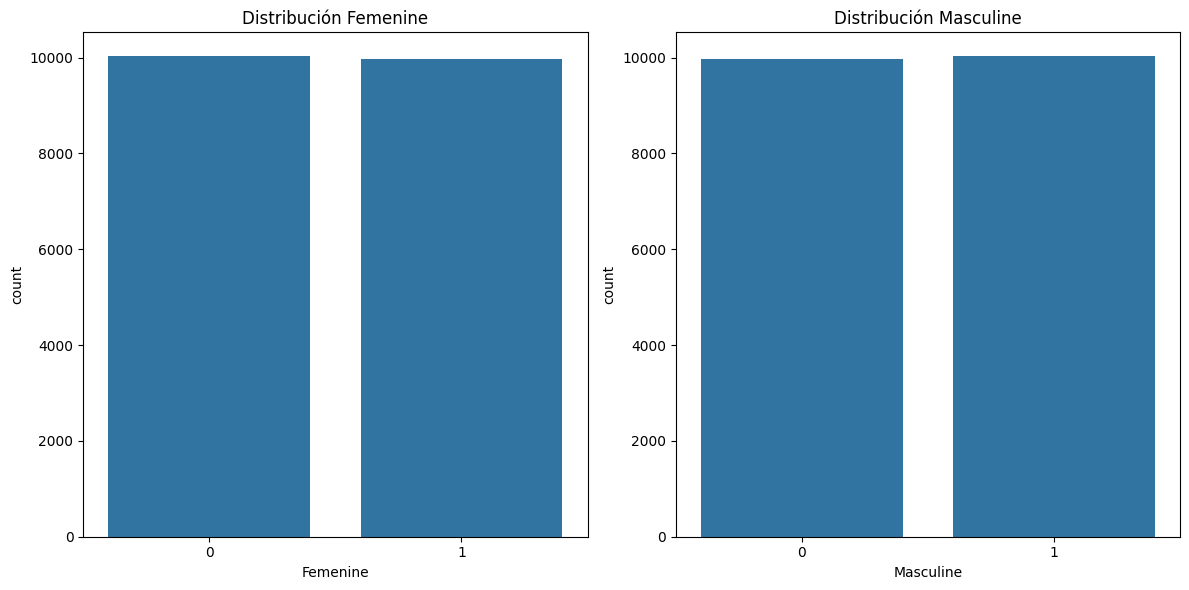

In [15]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
sns.countplot(x='Femenine', data=df, ax=axes[0])
axes[0].set_title('Distribución Femenine')
sns.countplot(x='Masculine', data=df, ax=axes[1])
axes[1].set_title('Distribución Masculine')
plt.tight_layout()
plt.show()

### Age

<Axes: xlabel='Age'>

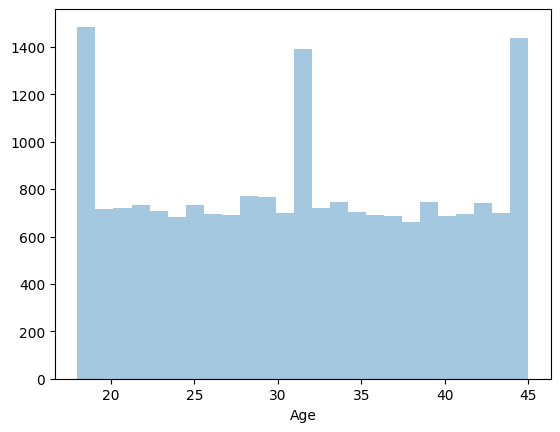

In [16]:
sns.distplot(df['Age'], kde=False)

### Sleep

#### Duration

American Academy of Sleep Medicine clasifica la duración del sueño en 4 grupos: privación del sueño (<=5h), sueño corto (5-7h), recomendado (7-9h) y largo (>9h)

<Axes: ylabel='Sleep duration'>

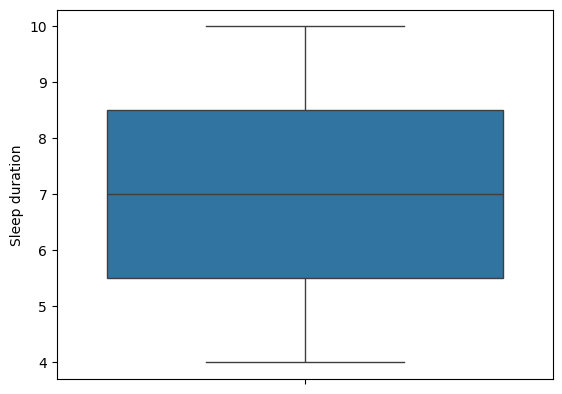

In [17]:
sns.boxplot(df['Sleep duration'])

<Axes: xlabel='Sleep duration', ylabel='Density'>

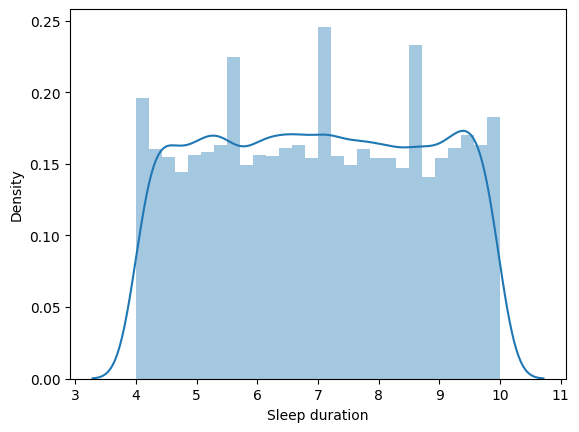

In [18]:
sns.distplot(df['Sleep duration'], kde=True)

In [19]:
def Sleep_Duration (h):
    if h >= 9:
        return "Long Sleep"
    elif h >= 7:
        return "Recommended Sleep"
    elif h >= 5:
        return "Short Sleep"
    else:
        return "Sleep Deprivation"

df["Sleep duration"] = df.apply(lambda row: Sleep_Duration(row["Sleep duration"]), axis=1)

In [20]:
df.head()

,Age,Femenine,Masculine,Sleep duration,Sleep quality,Stress level,Blood pressure,Heart rate,Daily steps,Physical activity,...,Wake up during night,Feel sleepy during day,Caffeine consumption,Alcohol consumption,Smoking,Medical issue,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter
0,24,1,0,Long Sleep,2,1,137/89,67,3000,31,...,N,N,N,N,N,Y,Y,N,8.7,N
1,39,0,1,Long Sleep,2,3,108/64,60,12000,74,...,N,N,N,Y,N,Y,Y,N,9.6,Y
2,45,1,0,Short Sleep,1,5,134/81,95,12000,93,...,Y,N,Y,Y,N,N,N,Y,4.0,N
3,45,1,0,Short Sleep,4,5,110/90,78,19000,32,...,N,N,Y,N,N,Y,N,N,7.6,N
4,42,1,0,Short Sleep,3,2,99/67,72,4000,173,...,Y,N,N,N,N,Y,N,N,3.5,N


In [21]:
pd.crosstab(df['Sleep duration'], df['Sleep quality'])

Sleep quality,1,2,3,4,5
Sleep duration,,,,,
Long Sleep,697,715,721,702,726
Recommended Sleep,1366,1339,1275,1370,1245
Short Sleep,1329,1306,1426,1295,1364
Sleep Deprivation,611,635,602,643,633


In [22]:
pd.crosstab(df['Sleep duration'], df['Sleep quality'], normalize=True, margins=True).mul(100).round(2)

Sleep quality,1,2,3,4,5,All
Sleep duration,,,,,,
Long Sleep,3.48,3.58,3.60,3.51,3.63,17.80
Recommended Sleep,6.83,6.69,6.38,6.85,6.22,32.98
Short Sleep,6.64,6.53,7.13,6.48,6.82,33.60
Sleep Deprivation,3.06,3.18,3.01,3.22,3.16,15.62
All,20.02,19.98,20.12,20.05,19.84,100.00


#### Quality

<Axes: xlabel='Sleep quality'>

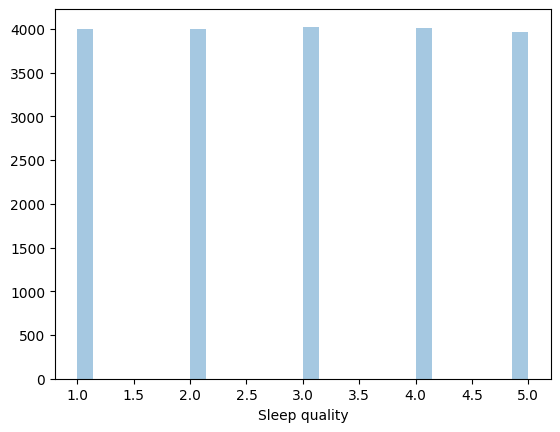

In [24]:
sns.distplot(df['Sleep quality'], kde=False)

### Stress level

<Axes: xlabel='Stress level'>

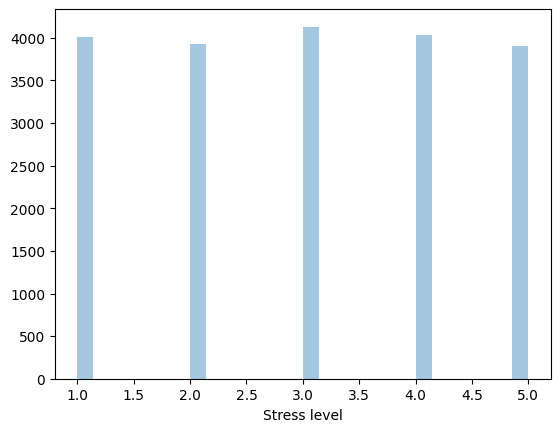

In [25]:
sns.distplot(df['Stress level'], kde=False)

In [26]:
pd.crosstab(df['Stress level'], df['Sleep quality'], normalize=True, margins=True).mul(100).round(2)

Sleep quality,1,2,3,4,5,All
Stress level,,,,,,
1,3.80,4.14,4.14,4.04,3.93,20.06
2,3.88,4.02,3.90,3.86,4.00,19.65
3,4.36,4.10,4.12,4.05,4.03,20.66
4,4.03,4.10,3.96,4.06,3.99,20.14
5,3.94,3.62,4.00,4.04,3.90,19.50
All,20.02,19.98,20.12,20.05,19.84,100.00


### Blood Pressure

In [27]:
# División de presión sanguínea entre sistólica y diastólica

df[['systolic', 'diastolic']] = df['Blood pressure'].str.split('/', expand=True).astype(int)
df

,Age,Femenine,Masculine,Sleep duration,Sleep quality,Stress level,Blood pressure,Heart rate,Daily steps,Physical activity,...,Caffeine consumption,Alcohol consumption,Smoking,Medical issue,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter,systolic,diastolic
0,24,1,0,Long Sleep,2,1,137/89,67,3000,31,...,N,N,N,Y,Y,N,8.7,N,137,89
1,39,0,1,Long Sleep,2,3,108/64,60,12000,74,...,N,Y,N,Y,Y,N,9.6,Y,108,64
2,45,1,0,Short Sleep,1,5,134/81,95,12000,93,...,Y,Y,N,N,N,Y,4.0,N,134,81
3,45,1,0,Short Sleep,4,5,110/90,78,19000,32,...,Y,N,N,Y,N,N,7.6,N,110,90
4,42,1,0,Short Sleep,3,2,99/67,72,4000,173,...,N,N,N,Y,N,N,3.5,N,99,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,26,0,1,Long Sleep,2,3,132/64,91,20000,88,...,N,N,Y,Y,Y,Y,3.8,N,132,64
19996,39,1,0,Recommended Sleep,3,4,101/75,65,2000,53,...,N,Y,N,Y,Y,N,3.8,N,101,75
19997,20,1,0,Recommended Sleep,5,3,124/63,78,10000,17,...,Y,Y,Y,Y,N,N,8.4,N,124,63
19998,38,0,1,Sleep Deprivation,3,3,136/70,60,3000,115,...,Y,Y,Y,N,Y,N,2.2,N,136,70


In [28]:
# Comprobación de valores máximos y mínimos presentes en el dataframe
print("syst_max:", df['systolic'].max())
print("syst_min:", df['systolic'].min())
print("dias_max:", df['diastolic'].max())
print("dias_min:", df['diastolic'].min())

syst_max: 140
syst_min: 90
dias_max: 90
dias_min: 60


Los valores de presión sanguínea son los siguientes:
- **Low:** <=90 and <=60
- **Normal:** 120 and 80
- **Elevated:** 120-129 and <80
- **High/Hypertension:** 130-139 or 80-89
- **High/Hypertension 2:** >=140 or >=90

In [29]:
def blood_pressure(systolic, diastolic):
    if systolic >= 140 or diastolic >= 90:
        return "Hypertension 2"
    elif systolic >= 130 or diastolic >= 80:
        return "Hypertension 1"
    elif systolic >= 120 and diastolic < 80:
        return "Elevated"
    elif systolic > 90 and diastolic > 60:
        return "Normal"
    else:
        return "Low"

df["Blood Pressure"] = df.apply(lambda row: blood_pressure(row["systolic"], row["diastolic"]), axis=1)

In [ ]:
# Eliminamos las columnas que ya no son necesarias
df= df.drop(['Blood pressure', 'systolic', 'diastolic'], axis=1)

In [33]:
df.rename(columns={'Blood Pressure': 'Blood pressure'}, inplace=True)
pressure=df.pop('Blood pressure')
df.insert(6, 'Blood pressure', pressure)
df.head()

,Age,Femenine,Masculine,Sleep duration,Sleep quality,Stress level,Blood pressure,Heart rate,Daily steps,Physical activity,...,Wake up during night,Feel sleepy during day,Caffeine consumption,Alcohol consumption,Smoking,Medical issue,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter
0,24,1,0,Long Sleep,2,1,Hypertension 1,67,3000,31,...,N,N,N,N,N,Y,Y,N,8.7,N
1,39,0,1,Long Sleep,2,3,Normal,60,12000,74,...,N,N,N,Y,N,Y,Y,N,9.6,Y
2,45,1,0,Short Sleep,1,5,Hypertension 1,95,12000,93,...,Y,N,Y,Y,N,N,N,Y,4.0,N
3,45,1,0,Short Sleep,4,5,Hypertension 2,78,19000,32,...,N,N,Y,N,N,Y,N,N,7.6,N
4,42,1,0,Short Sleep,3,2,Normal,72,4000,173,...,Y,N,N,N,N,Y,N,N,3.5,N


In [34]:
pd.crosstab(df['Blood pressure'], df['Sleep quality'], normalize=True, margins=True).mul(100).round(2)

Sleep quality,1,2,3,4,5,All
Blood pressure,,,,,,
Elevated,2.50,2.57,2.64,2.62,2.54,12.87
Hypertension 1,9.04,8.70,8.82,8.71,8.88,44.16
Hypertension 2,1.11,1.00,1.04,1.12,1.03,5.29
Low,0.61,0.72,0.58,0.66,0.58,3.14
Normal,6.76,6.98,7.03,6.94,6.82,34.54
All,20.02,19.98,20.12,20.05,19.84,100.00


### Heart rate

### Exercise

#### Daily steps

#### Physical activity

### BMI

### Sleep

#### Sleep disorder

#### Wake up during night

#### Feel sleepy during day

### Substances

#### Caffeine consumption

#### Alcohol consumption

#### Smoking

### Medicine

#### Medical issue

#### Ongoing medication

### Technology

#### Smart-device before bed

#### Average screen time

#### Blue-light filter

## 5. Preparación de Datos

1. Split de datos:
   - Train/Test/Validation
   - Mantener estratificación si es necesario
2. Procesamiento de variables (fit solo en train):
   - Codificación de variables categóricas
   - Normalización/Estandarización de variables numéricas
3. Balanceo de clases (solo en train si es necesario):
   - Oversampling
   - Undersampling
   - Técnicas híbridas

### Divide en train, test y validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Sleep quality', axis=1),
                                                    df['Sleep quality'],
                                                    test_size=0.2,
                                                    random_state=42)

### Target

In [ ]:
fig, axes = plt.subplots(1, 3, figsize= (15,5), sharey=True)

sns.countplot(x="Sleep quality", data=df, ax=axes[0])
axes[0].set_title("Original target")

sns.countplot(y_rus, ax=axes[1])
axes[1].set_title("Random Under Sampler")

sns.countplot(y_ros, ax=axes[2])
axes[2].set_title("Random Over Sampler")

## 6. Selección de Modelos Base

1. Implementar validación cruzada para varios modelos
2. Evaluar modelos básicos según el tipo de problema
3. Comparar resultados iniciales
4. Seleccionar los 3-5 mejores modelos
5. Documentar razones de selección

## 7. Optimización de Modelos Seleccionados

1. Realizar ajuste de hiperparámetros para cada modelo:
   - Grid Search
   - Random Search
   - Bayesian Optimization
2. Evaluar resultados de cada modelo optimizado
3. Considerar ensamble de mejores modelos
4. Seleccionar el modelo final

## 8. Evaluación y Análisis

1. Evaluar métricas finales en datos de test
2. Realizar análisis detallado de errores
3. Interpretar resultados:
   - Importancia de características
   - SHAP values
   - Partial dependence plots
4. Validar supuestos del modelo
5. Analizar casos específicos de error
6. Documentar hallazgos principales

## 9. Despliegue y Documentación

1. Preparar el modelo para producción:
   - Optimizar código
   - Crear pipeline de predicción
2. Documentar todo el proceso:
   - Decisiones tomadas
   - Resultados obtenidos
   - Limitaciones encontradas
3. Establecer plan de monitoreo:
   - Métricas a seguir
   - Frecuencia de actualización
   - Procedimientos de mantenimiento

## Análisis Bivariante

## Eliminación de Features

## Duplicados

## Missings

## Anomalías y Errores

## Outliers

## Feature Engineering

## Feature Reduction

## Escoger Métrica del Modelo

## Decidir sobre los Modelos

## Elegir Hiperparámetros

## Definición de Pipelines y Probamos

## Resultados